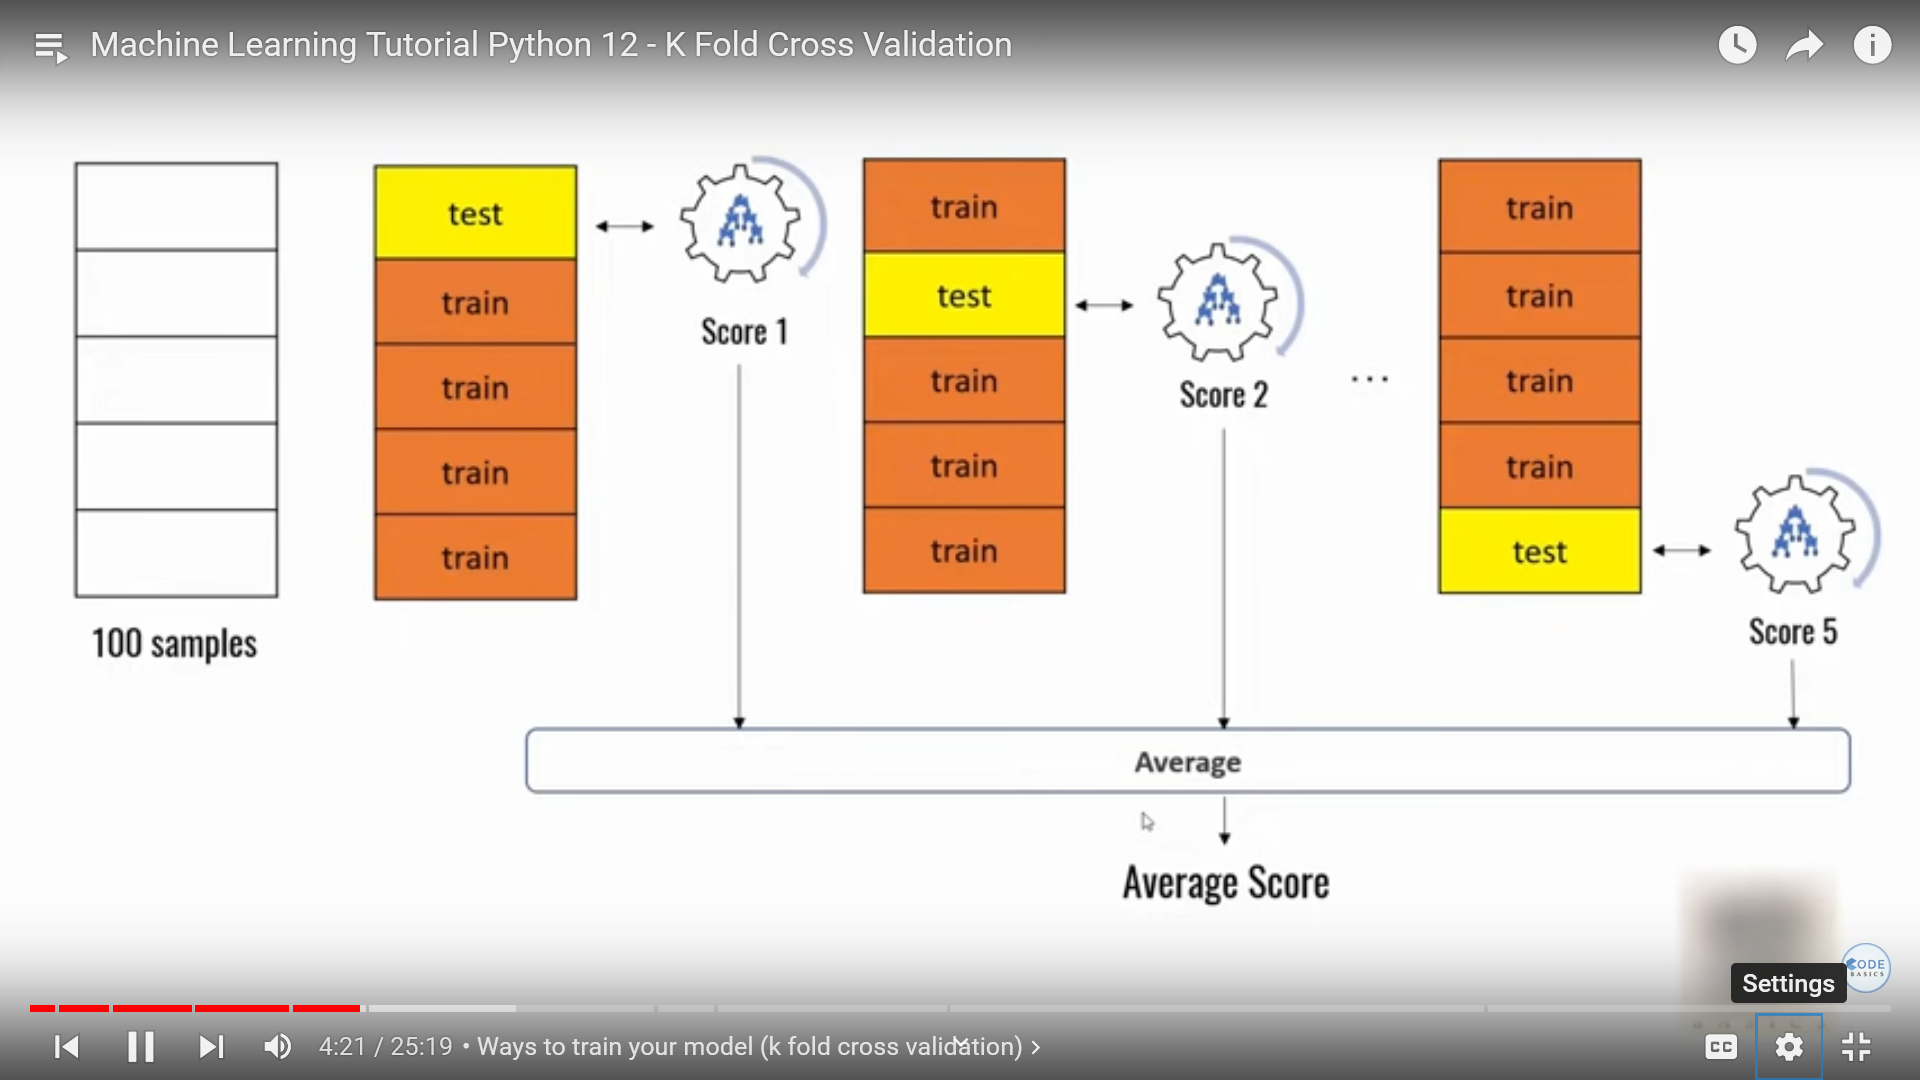

## here we use alternate way of  train and test method

# K Fold

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits


In [3]:
digits = load_digits()

In [6]:
  # splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [20]:
# linearRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593

In [21]:
# Support Vector
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)


0.987037037037037

In [22]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9666666666666667

In [23]:
# with every different set of training and testing data the score comes different 
# so for solving this we use K_Fold

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) # number of folds you want to make
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [25]:
# here we are going to look how splitting is made 


In [26]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


[3 4 5 6 7 8] [0 1 2] # here train and test data splitted
[0 1 2 6 7 8] [3 4 5] # the data which is in train now in test
[0 1 2 3 4 5] [6 7 8] # it will go continuosly like this

In [27]:
# so for getting score of different model we are making a fucnction named as get_score

In [29]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [30]:
 get_score(SVC(),X_train,X_test,y_train,y_test)

0.987037037037037

In [31]:
# StratifiedKFold better than KFold split in a uniform way


In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
folds = StratifiedKFold(n_splits=3)

In [34]:
# now you have to check which model is best

In [39]:
# saving the scores of each fold 
scores_l =[]
scores_svm= []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test = digits.data[train_index],digits.data[test_index], \
                                    digits.target[train_index],digits.target[test_index]
    #adding the scores in array using the function
    scores_l.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))
                                      

C:\Users\OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [41]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [42]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [43]:
scores_rf

[0.9282136894824707, 0.9549248747913188, 0.9298831385642737]

In [50]:
#cross val score (the one procedure we have done up can be sone by this)

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

C:\Users\OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [47]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [49]:
cross_val_score(RandomForestClassifier(),digits.data,digits.target)

array([0.92777778, 0.90277778, 0.96100279, 0.96935933, 0.93036212])